In [1]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:80% !important;}
"""))

# RNN

## 문맥을 이용하여 모델 만들기

In [2]:
text = """경마장에 있는 말이 뛰고 싶다
그의 말이 법이다
가는 말이 고와야 오는 말이 곱다"""

In [3]:
from keras_preprocessing.text import Tokenizer

In [4]:
t = Tokenizer()
t.fit_on_texts([text])
encoded = t.texts_to_sequences([text])
encoded

[[2, 3, 1, 4, 5, 6, 1, 7, 8, 1, 9, 10, 1, 11]]

In [5]:
print(t.word_index)

{'말이': 1, '경마장에': 2, '있는': 3, '뛰고': 4, '싶다': 5, '그의': 6, '법이다': 7, '가는': 8, '고와야': 9, '오는': 10, '곱다': 11}


In [6]:
t.texts_to_sequences(['곱다'])[0]

[11]

In [7]:
sequences = []
for line in text.split('\n'):
    encoded = t.texts_to_sequences([line])[0]
    print('원래 문장 :',line)
    print('encoed 문장 :', encoded)
    for i in range(0, len(encoded)-1):
        for j in range(i+2, len(encoded)+1):
            sequences.append(encoded[i:j])
print()
for sequence in sequences:
    print('[', end='')
    for word_seq in sequence:
        for key, value in t.word_index.items():
            if value==word_seq:
                print("{}:{}".format(value, key), end='  ')
    print(']')

원래 문장 : 경마장에 있는 말이 뛰고 싶다
encoed 문장 : [2, 3, 1, 4, 5]
원래 문장 : 그의 말이 법이다
encoed 문장 : [6, 1, 7]
원래 문장 : 가는 말이 고와야 오는 말이 곱다
encoed 문장 : [8, 1, 9, 10, 1, 11]

[2:경마장에  3:있는  ]
[2:경마장에  3:있는  1:말이  ]
[2:경마장에  3:있는  1:말이  4:뛰고  ]
[2:경마장에  3:있는  1:말이  4:뛰고  5:싶다  ]
[3:있는  1:말이  ]
[3:있는  1:말이  4:뛰고  ]
[3:있는  1:말이  4:뛰고  5:싶다  ]
[1:말이  4:뛰고  ]
[1:말이  4:뛰고  5:싶다  ]
[4:뛰고  5:싶다  ]
[6:그의  1:말이  ]
[6:그의  1:말이  7:법이다  ]
[1:말이  7:법이다  ]
[8:가는  1:말이  ]
[8:가는  1:말이  9:고와야  ]
[8:가는  1:말이  9:고와야  10:오는  ]
[8:가는  1:말이  9:고와야  10:오는  1:말이  ]
[8:가는  1:말이  9:고와야  10:오는  1:말이  11:곱다  ]
[1:말이  9:고와야  ]
[1:말이  9:고와야  10:오는  ]
[1:말이  9:고와야  10:오는  1:말이  ]
[1:말이  9:고와야  10:오는  1:말이  11:곱다  ]
[9:고와야  10:오는  ]
[9:고와야  10:오는  1:말이  ]
[9:고와야  10:오는  1:말이  11:곱다  ]
[10:오는  1:말이  ]
[10:오는  1:말이  11:곱다  ]
[1:말이  11:곱다  ]


In [8]:
sequences

[[2, 3],
 [2, 3, 1],
 [2, 3, 1, 4],
 [2, 3, 1, 4, 5],
 [3, 1],
 [3, 1, 4],
 [3, 1, 4, 5],
 [1, 4],
 [1, 4, 5],
 [4, 5],
 [6, 1],
 [6, 1, 7],
 [1, 7],
 [8, 1],
 [8, 1, 9],
 [8, 1, 9, 10],
 [8, 1, 9, 10, 1],
 [8, 1, 9, 10, 1, 11],
 [1, 9],
 [1, 9, 10],
 [1, 9, 10, 1],
 [1, 9, 10, 1, 11],
 [9, 10],
 [9, 10, 1],
 [9, 10, 1, 11],
 [10, 1],
 [10, 1, 11],
 [1, 11]]

In [9]:
print([len(s) for s in sequences])

[2, 3, 4, 5, 2, 3, 4, 2, 3, 2, 2, 3, 2, 2, 3, 4, 5, 6, 2, 3, 4, 5, 2, 3, 4, 2, 3, 2]


In [10]:
# sequences에 제일 많은 단어가 들어 있는 갯수# sequences에 제일 많은 단어가 들어 있는 갯수
maxlen = max([len(s) for s in sequences])
maxlen

6

In [11]:
type(sequences), len(sequences)

(list, 28)

In [12]:
# sequences를 훈련가능한 데이터로 만들기
from tensorflow.keras.preprocessing.sequence import pad_sequences
sequences = pad_sequences(sequences=sequences, 
                         maxlen=maxlen, 
                         padding='pre')
type(sequences), len(sequences), sequences

(numpy.ndarray,
 28,
 array([[ 0,  0,  0,  0,  2,  3],
        [ 0,  0,  0,  2,  3,  1],
        [ 0,  0,  2,  3,  1,  4],
        [ 0,  2,  3,  1,  4,  5],
        [ 0,  0,  0,  0,  3,  1],
        [ 0,  0,  0,  3,  1,  4],
        [ 0,  0,  3,  1,  4,  5],
        [ 0,  0,  0,  0,  1,  4],
        [ 0,  0,  0,  1,  4,  5],
        [ 0,  0,  0,  0,  4,  5],
        [ 0,  0,  0,  0,  6,  1],
        [ 0,  0,  0,  6,  1,  7],
        [ 0,  0,  0,  0,  1,  7],
        [ 0,  0,  0,  0,  8,  1],
        [ 0,  0,  0,  8,  1,  9],
        [ 0,  0,  8,  1,  9, 10],
        [ 0,  8,  1,  9, 10,  1],
        [ 8,  1,  9, 10,  1, 11],
        [ 0,  0,  0,  0,  1,  9],
        [ 0,  0,  0,  1,  9, 10],
        [ 0,  0,  1,  9, 10,  1],
        [ 0,  1,  9, 10,  1, 11],
        [ 0,  0,  0,  0,  9, 10],
        [ 0,  0,  0,  9, 10,  1],
        [ 0,  0,  9, 10,  1, 11],
        [ 0,  0,  0,  0, 10,  1],
        [ 0,  0,  0, 10,  1, 11],
        [ 0,  0,  0,  0,  1, 11]]))

In [13]:
# 독립변수(X)와 종속변수(Y) 분리
X = sequences[:, :-1]
Y = sequences[:, -1]
Y

array([ 3,  1,  4,  5,  1,  4,  5,  4,  5,  5,  1,  7,  7,  1,  9, 10,  1,
       11,  9, 10,  1, 11, 10,  1, 11,  1, 11, 11])

In [14]:
print(t.word_index)

{'말이': 1, '경마장에': 2, '있는': 3, '뛰고': 4, '싶다': 5, '그의': 6, '법이다': 7, '가는': 8, '고와야': 9, '오는': 10, '곱다': 11}


In [15]:
vocab_size = len(t.word_index)+1
vocab_size

12

In [16]:
# Y 원핫인코딩
from tensorflow.keras.utils import to_categorical
Y = to_categorical(Y, num_classes=vocab_size)
Y

array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.,

In [17]:
X.shape[1]

5

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Embedding

# RNN 모델 생성
model = Sequential()
# 희소행렬로 변환 (10:벡터)
model.add(Embedding(vocab_size, 10, input_length=X.shape[1]))
model.add(SimpleRNN(32))
model.add(Dense(vocab_size, activation="softmax"))

# 모델 학습과정 설정
model.compile(loss="categorical_crossentropy", optimizer="adam", 
              metrics=['accuracy'])

# 학습시키기
hist = model.fit(X, Y, epochs=300, verbose=2)

Epoch 1/300
1/1 - 1s - loss: 2.4678 - accuracy: 0.0714
Epoch 2/300
1/1 - 0s - loss: 2.4558 - accuracy: 0.0714
Epoch 3/300
1/1 - 0s - loss: 2.4439 - accuracy: 0.1429
Epoch 4/300
1/1 - 0s - loss: 2.4318 - accuracy: 0.1429
Epoch 5/300
1/1 - 0s - loss: 2.4196 - accuracy: 0.1071
Epoch 6/300
1/1 - 0s - loss: 2.4071 - accuracy: 0.1071
Epoch 7/300
1/1 - 0s - loss: 2.3942 - accuracy: 0.1071
Epoch 8/300
1/1 - 0s - loss: 2.3810 - accuracy: 0.1071
Epoch 9/300
1/1 - 0s - loss: 2.3672 - accuracy: 0.0714
Epoch 10/300
1/1 - 0s - loss: 2.3530 - accuracy: 0.1071
Epoch 11/300
1/1 - 0s - loss: 2.3383 - accuracy: 0.1071
Epoch 12/300
1/1 - 0s - loss: 2.3230 - accuracy: 0.1071
Epoch 13/300
1/1 - 0s - loss: 2.3071 - accuracy: 0.1071
Epoch 14/300
1/1 - 0s - loss: 2.2906 - accuracy: 0.1071
Epoch 15/300
1/1 - 0s - loss: 2.2735 - accuracy: 0.1071
Epoch 16/300
1/1 - 0s - loss: 2.2559 - accuracy: 0.1071
Epoch 17/300
1/1 - 0s - loss: 2.2379 - accuracy: 0.1071
Epoch 18/300
1/1 - 0s - loss: 2.2194 - accuracy: 0.1071
E

Epoch 147/300
1/1 - 0s - loss: 0.7641 - accuracy: 0.8214
Epoch 148/300
1/1 - 0s - loss: 0.7576 - accuracy: 0.8214
Epoch 149/300
1/1 - 0s - loss: 0.7511 - accuracy: 0.8214
Epoch 150/300
1/1 - 0s - loss: 0.7447 - accuracy: 0.8214
Epoch 151/300
1/1 - 0s - loss: 0.7384 - accuracy: 0.8214
Epoch 152/300
1/1 - 0s - loss: 0.7321 - accuracy: 0.8214
Epoch 153/300
1/1 - 0s - loss: 0.7260 - accuracy: 0.8214
Epoch 154/300
1/1 - 0s - loss: 0.7199 - accuracy: 0.8214
Epoch 155/300
1/1 - 0s - loss: 0.7139 - accuracy: 0.8214
Epoch 156/300
1/1 - 0s - loss: 0.7079 - accuracy: 0.8214
Epoch 157/300
1/1 - 0s - loss: 0.7020 - accuracy: 0.8214
Epoch 158/300
1/1 - 0s - loss: 0.6962 - accuracy: 0.8214
Epoch 159/300
1/1 - 0s - loss: 0.6905 - accuracy: 0.8214
Epoch 160/300
1/1 - 0s - loss: 0.6848 - accuracy: 0.8214
Epoch 161/300
1/1 - 0s - loss: 0.6792 - accuracy: 0.8214
Epoch 162/300
1/1 - 0s - loss: 0.6736 - accuracy: 0.8214
Epoch 163/300
1/1 - 0s - loss: 0.6682 - accuracy: 0.8214
Epoch 164/300
1/1 - 0s - loss: 

Epoch 291/300
1/1 - 0s - loss: 0.3007 - accuracy: 0.8929
Epoch 292/300
1/1 - 0s - loss: 0.2995 - accuracy: 0.8929
Epoch 293/300
1/1 - 0s - loss: 0.2983 - accuracy: 0.8929
Epoch 294/300
1/1 - 0s - loss: 0.2972 - accuracy: 0.8929
Epoch 295/300
1/1 - 0s - loss: 0.2961 - accuracy: 0.8929
Epoch 296/300
1/1 - 0s - loss: 0.2950 - accuracy: 0.8929
Epoch 297/300
1/1 - 0s - loss: 0.2939 - accuracy: 0.8929
Epoch 298/300
1/1 - 0s - loss: 0.2928 - accuracy: 0.8929
Epoch 299/300
1/1 - 0s - loss: 0.2918 - accuracy: 0.8929
Epoch 300/300
1/1 - 0s - loss: 0.2907 - accuracy: 0.8929


In [19]:
# 모델 평가
model.evaluate(X, Y)

1/1 [==============================] - 0s 241ms/step - loss: 0.2897 - accuracy: 0.8929


[0.28968507051467896, 0.8928571343421936]

In [20]:
hist.history.keys()

dict_keys(['loss', 'accuracy'])

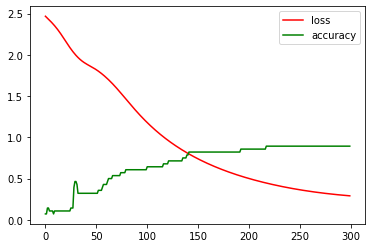

In [21]:
# 학습과정 보기
import matplotlib.pyplot as plt
plt.plot(hist.history['loss'], color='r', label="loss")
plt.plot(hist.history['accuracy'], color='g', label='accuracy')
plt.legend()

In [22]:
#'경마장에' 뒤에 나오는 단어를 모델에 의해 추측
encoded = t.texts_to_sequences(['경마장에'])[0]
encoded = pad_sequences([encoded], maxlen=5, padding='pre')
result = model.predict_classes(encoded)
print('예측결과값: ', result[0])
for key, value in t.word_index.items():
    if value==result[0]:
        print("예측된 단어: ", key)
        break

예측결과값:  3
예측된 단어:  있는


C:\Users\tjoeun\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [23]:
#입력받은 단어를 모델에 의해 추측
word = input('입력 단어: ')
encoded = t.texts_to_sequences([word])[0]
encoded = pad_sequences([encoded], maxlen=5, padding='pre')
result = model.predict_classes(encoded)
print('예측결과값: ', result[0])
for key, value in t.word_index.items():
    if value==result[0]:
        print("예측된 단어: ", key)
        break

입력 단어: 말이
예측결과값:  7
예측된 단어:  법이다


## 다음 문맥 예측해보기

In [26]:
# "경마장에" 이후에 올 단어  4개 예측 => 경마장에 있는 말이 뛰고
#  -----                   --
import numpy as np
def sentence_generation(model, t, current_word, n):
    init_word = current_word
    print("입력 단어 :", init_word)
    setence = ""
    for i in range(1,n+1):
        encoded = t.texts_to_sequences([current_word])[0]
        encoded = pad_sequences([encoded], maxlen=5, padding='pre')
        result = np.argmax(model.predict(encoded))
        for word, index in t.word_index.items():
            if index==result:
                print("{}번째 : {}:{}".format(i, word, result))
                current_word = current_word + ' ' + word
                break;
    return current_word

In [27]:
sentence_generation(model, t, "경마장에", 4)

입력 단어 : 경마장에
1번째 : 있는:3
2번째 : 말이:1
3번째 : 뛰고:4
4번째 : 싶다:5


'경마장에 있는 말이 뛰고 싶다'

In [28]:
sentence_generation(model, t, "가는 말이", 4)

입력 단어 : 가는 말이
1번째 : 고와야:9
2번째 : 오는:10
3번째 : 말이:1
4번째 : 곱다:11


'가는 말이 고와야 오는 말이 곱다'

## LSTM

In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Embedding

# RNN 모델 생성
model = Sequential()
# 희소행렬로 변환 (10:벡터)
model.add(Embedding(vocab_size, 10, input_length=X.shape[1]))
model.add(SimpleRNN(32))
model.add(Dense(vocab_size, activation="softmax"))

# 모델 학습과정 설정
model.compile(loss="categorical_crossentropy", optimizer="adam", 
              metrics=['accuracy'])

# 학습시키기
hist = model.fit(X, Y, epochs=300, verbose=2)

Epoch 1/300
1/1 - 1s - loss: 2.5018 - accuracy: 0.0357
Epoch 2/300
1/1 - 0s - loss: 2.4873 - accuracy: 0.1071
Epoch 3/300
1/1 - 0s - loss: 2.4731 - accuracy: 0.1071
Epoch 4/300
1/1 - 0s - loss: 2.4590 - accuracy: 0.1429
Epoch 5/300
1/1 - 0s - loss: 2.4450 - accuracy: 0.1429
Epoch 6/300
1/1 - 0s - loss: 2.4309 - accuracy: 0.1071
Epoch 7/300
1/1 - 0s - loss: 2.4165 - accuracy: 0.1071
Epoch 8/300
1/1 - 0s - loss: 2.4018 - accuracy: 0.1429
Epoch 9/300
1/1 - 0s - loss: 2.3866 - accuracy: 0.1786
Epoch 10/300
1/1 - 0s - loss: 2.3709 - accuracy: 0.1786
Epoch 11/300
1/1 - 0s - loss: 2.3546 - accuracy: 0.1786
Epoch 12/300
1/1 - 0s - loss: 2.3377 - accuracy: 0.2143
Epoch 13/300
1/1 - 0s - loss: 2.3200 - accuracy: 0.2143
Epoch 14/300
1/1 - 0s - loss: 2.3016 - accuracy: 0.2857
Epoch 15/300
1/1 - 0s - loss: 2.2825 - accuracy: 0.3214
Epoch 16/300
1/1 - 0s - loss: 2.2627 - accuracy: 0.3571
Epoch 17/300
1/1 - 0s - loss: 2.2423 - accuracy: 0.3571
Epoch 18/300
1/1 - 0s - loss: 2.2213 - accuracy: 0.3929
E

Epoch 147/300
1/1 - 0s - loss: 0.7652 - accuracy: 0.7857
Epoch 148/300
1/1 - 0s - loss: 0.7579 - accuracy: 0.7857
Epoch 149/300
1/1 - 0s - loss: 0.7507 - accuracy: 0.7857
Epoch 150/300
1/1 - 0s - loss: 0.7437 - accuracy: 0.7857
Epoch 151/300
1/1 - 0s - loss: 0.7367 - accuracy: 0.7857
Epoch 152/300
1/1 - 0s - loss: 0.7298 - accuracy: 0.7857
Epoch 153/300
1/1 - 0s - loss: 0.7230 - accuracy: 0.7857
Epoch 154/300
1/1 - 0s - loss: 0.7163 - accuracy: 0.7857
Epoch 155/300
1/1 - 0s - loss: 0.7097 - accuracy: 0.7857
Epoch 156/300
1/1 - 0s - loss: 0.7031 - accuracy: 0.7857
Epoch 157/300
1/1 - 0s - loss: 0.6967 - accuracy: 0.7857
Epoch 158/300
1/1 - 0s - loss: 0.6903 - accuracy: 0.7857
Epoch 159/300
1/1 - 0s - loss: 0.6840 - accuracy: 0.7857
Epoch 160/300
1/1 - 0s - loss: 0.6778 - accuracy: 0.7857
Epoch 161/300
1/1 - 0s - loss: 0.6716 - accuracy: 0.7857
Epoch 162/300
1/1 - 0s - loss: 0.6656 - accuracy: 0.7857
Epoch 163/300
1/1 - 0s - loss: 0.6596 - accuracy: 0.7857
Epoch 164/300
1/1 - 0s - loss: 

Epoch 291/300
1/1 - 0s - loss: 0.2874 - accuracy: 0.8929
Epoch 292/300
1/1 - 0s - loss: 0.2863 - accuracy: 0.8929
Epoch 293/300
1/1 - 0s - loss: 0.2853 - accuracy: 0.8929
Epoch 294/300
1/1 - 0s - loss: 0.2844 - accuracy: 0.8929
Epoch 295/300
1/1 - 0s - loss: 0.2834 - accuracy: 0.8929
Epoch 296/300
1/1 - 0s - loss: 0.2824 - accuracy: 0.8929
Epoch 297/300
1/1 - 0s - loss: 0.2815 - accuracy: 0.8929
Epoch 298/300
1/1 - 0s - loss: 0.2806 - accuracy: 0.8929
Epoch 299/300
1/1 - 0s - loss: 0.2797 - accuracy: 0.8929
Epoch 300/300
1/1 - 0s - loss: 0.2788 - accuracy: 0.8929
